# <center> Практическая работа №12.
### <center>Регрессионный анализ: линейная по параметрам регрессионная модель общего вида 

In [3]:
#Загрузка основных модулей:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
from sklearn.linear_model import LinearRegression

**Задание 1.** Осуществите статистическую обработку двумерной выборки по следующему плану.

1) Постройте диаграмму рассеивания и проанализируйте ее с точки зрения наличия и характера связи между компонентами выборочного вектора. Оправдано ли для описания зависимости использовать модель $Y = \beta_0 + \beta_1 x + \beta_2 x^2 + E$? Если вы считаете, что не оправдано, то для выполнения следующих заданий используйте иную линейную регрессионную модель общего вида (но обязательно отличную от модели, рассмотренной в практической работе № 11).

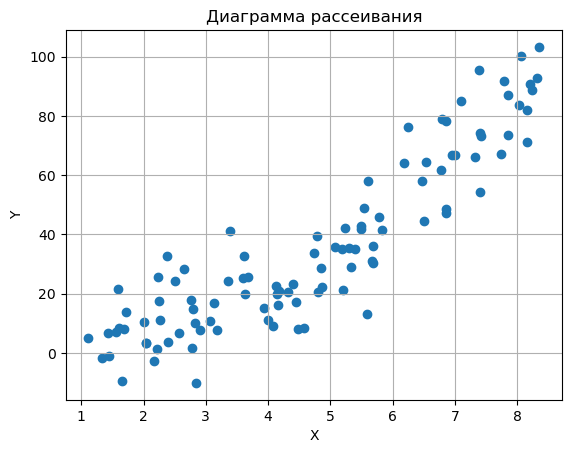

In [4]:
# Загрузка данных из файла Excel
data = pd.read_excel('Data_12_1.xlsx', header=0)

# Получение списка заголовков столбцов из данных
column = data.columns

# Извлечение значений из столбца с индексом 25, удаление пропущенных значений и преобразование в массив NumPy
x = np.array(data[column[25]].dropna())

# Извлечение значений из столбца с индексом 26, удаление пропущенных значений и преобразование в массив NumPy
y = np.array(data[column[26]].dropna())

plt.scatter(x, y)  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеивания')
plt.grid(True)
plt.show()

Смотря на диаграмму рассеивания, можно сделать вывод что зависимость не описывается линейной регрессией, тк есть изгиб. Следовательно, применяем модель $Y = \beta_0 + \beta_1 x + \beta_2 x^2 + E$

2) Считая, что $M [Y|x] = \beta_0 + \beta_1 x + \beta_2 x^2$, найдите оценки параметров модели $y = \beta_0 + \beta_1 x + \beta_2 x^2 $ (непосредственно по формулам, без использования специализированных функций языка программирования Python).

3) Нанесите график построенного в п. 2 уравнения регрессии на
диаграмму рассеивания.

b0: 9.781848840950975
b1: -4.14639873222956
b2: 1.7124766996395286
Проверка: [ 1.7124767  -4.14639873  9.78184884]


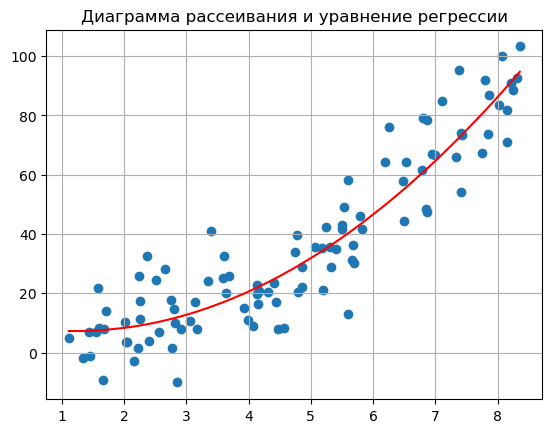

In [5]:
# Количество элементов в массиве x
n = len(x)

# Создание двумерного массива для хранения данных (n строк и 3 столбца)
# Столбцы: [1, x, x^2], которые соответствуют уравнению квадратичной регрессии
arr = np.zeros((n, 3))

# Заполнение массива arr: первый столбец — единицы, второй — значения x, третий — значения x^2
for i in range(0, n):
    arr[i] = [1, x[i], x[i]**2]

# Вычисление коэффициентов регрессии b с использованием формулы для множественной линейной регрессии:
# b = (X^T * X)^(-1) * X^T * y
b = np.dot(np.dot(np.linalg.inv(np.dot(arr.T, arr)), arr.T), y)

# Вывод коэффициентов регрессии
for i in range(0, 3):
    print(f"b{i}: {b[i]}")

# Проверка: использование функции NumPy для нахождения коэффициентов полиномиальной регрессии
proverka = np.polyfit(x, y, 2)
print("Проверка:", proverka)

# Настройка заголовка и сетки для графика
plt.title("Диаграмма рассеивания и уравнение регрессии")
plt.grid(True)

# Сортировка массива x для корректного построения линии регрессии
x_sort = sorted(x)

# Вычисление значений y для линии регрессии с использованием коэффициентов b
y1 = []
for i in x_sort:
    y1.append(b[0] + b[1] * i + b[2] * i**2)

# Построение линии регрессии (красная линия)
plt.plot(x_sort, y1, color='red')

# Построение диаграммы рассеивания исходных данных
plt.scatter(x, y)

plt.show()

**Задание 2.** В предположении, что ошибки наблюдений не коррелированы и имеют нормальное распределение $N (0,\sigma)$, оцените качество аппроксимации результатов наблюдения уравнением регрессии  $y = \beta_0 + \beta_1 x + \beta_2 x^2 $ :

1) проверьте значимость модели на уровне $\alpha =0,05$;

In [6]:
# Определение функции Q_e для вычисления суммы квадратов отклонений
def Q_e(x, y):
    sum = 0  # Инициализация переменной для накопления суммы квадратов отклонений
    for i in range(n):  # Проход по каждому элементу данных
        # Добавление квадрата отклонения: (y[i] - предсказанное значение)^2
        sum += (y[i] - (b[0] + b[1] * x[i] + b[2] * x[i]**2))**2
    return sum  # Возвращаем итоговую сумму квадратов отклонений

# Вычисление дисперсии остатков S^2
# Формула: S^2 = Q_e / (n - k), где k — количество параметров регрессии
S_2 = Q_e(x, y) / (n - 3)  # Здесь 3 — количество параметров в модели (b0, b1, b2)

# Вывод значения дисперсии остатков
print(f"S^2={S_2}")

S^2=116.93786039721289


In [7]:
# Определение функции Q_Y для вычисления общей суммы квадратов (общей дисперсии)
def Q_Y(y):
    summ = 0  # Инициализация переменной для накопления суммы квадратов отклонений
    My = np.mean(y)  # Вычисление среднего значения массива y
    for i in range(len(y)):  # Проход по каждому элементу массива y
        # Добавление квадрата отклонения от среднего значения: (y[i] - My)^2
        summ += (y[i] - My)**2
    return summ  # Возвращаем итоговую сумму квадратов

# Вычисление коэффициента детерминации R^2
# Формула: R^2 = 1 - (остаточная сумма квадратов / общая сумма квадратов)
R_2 = 1 - Q_e(x, y) / Q_Y(y)

# Вывод значения коэффициента детерминации
print(f"R^2 = {R_2}")

R^2 = 0.8642650995618002


In [ ]:
# Определение функции для вычисления объяснённой суммы квадратов (QR)
# b — коэффициенты регрессии
# arr — матрица с независимыми переменными (включая столбец для свободного члена и квадратичного члена)
# y — массив значений зависимой переменной
def Q_R(b, arr, y):
    n = len(y)  # Количество наблюдений
    # Вычисление объяснённой суммы квадратов (QR)
    # Формула: QR = b^T * (X^T * y) - n * (mean(y))^2
    QR = np.dot(b.T, np.dot(arr.T, y)) - n * (np.mean(y))**2
    return QR  # Возвращение результата

# Вызов функции и вывод результата
QR = Q_R(b, arr, y)
print(f"Qr = {QR}")


Qr = 73713.28827010561
68898.67063319235


In [9]:
F=QR/(2*S_2)
print(f"Fв = {F}")
Fcrit=sts.f(2,n-3).ppf(1-0.05)
print("Fкр =",Fcrit)

Fв = 315.1814477352217
Fкр = 3.08823962568078


В критическую область мы попали -> отвергаем гипотезу о незначимости модели 

2) найдите точечные оценки дисперсии ошибок наблюдений и ковариационной матрицы;

In [10]:
# Вычисление ковариационной матрицы оценок параметров методом наименьших квадратов (МНК)
cov = S_2 * np.linalg.inv(np.dot(arr.T, arr))
print(f"Оценка ковариационной матрицы МНК-оценок параметров:\n{cov}")

# Вычисление матрицы, обратной к X^T * X
B = np.linalg.inv(np.dot(arr.T, arr))

Оценка ковариационной матрицы МНК-оценок параметров:
[[ 31.55370891 -13.95391503   1.32595563]
 [-13.95391503   6.83339018  -0.68440145]
 [  1.32595563  -0.68440145   0.07122668]]


3) определите доверительные интервалы для параметров модели и дисперсии ошибок наблюдений при уровне значимости $\alpha =0,05$.

In [11]:
# Вывод доверительных интервалов для коэффициентов регрессии
print("Доверительные интервалы для коэффициентов регрессии:")
alpha = 0.05  # Уровень значимости
t_value = sts.t(n - 3).ppf(1 - alpha / 2)  # Квантиль распределения Стьюдента

for i in range(3):
    lower_bound = b[i] - t_value * (S_2**0.5) * (B[i, i]**0.5)
    upper_bound = b[i] + t_value * (S_2**0.5) * (B[i, i]**0.5)
    print(f"b{i}: ({lower_bound:.4f}; {upper_bound:.4f})")

# Вывод доверительных интервалов для дисперсии ошибок наблюдений
print("\nДоверительные интервалы для дисперсии ошибок наблюдений:")
chi2_upper = sts.chi2(n - 3).ppf(1 - alpha / 2)  # Верхний квантиль распределения Хи-квадрат
chi2_lower = sts.chi2(n - 3).ppf(alpha / 2)      # Нижний квантиль распределения Хи-квадрат

lower_dispersion = (n - 3) * S_2 / chi2_upper
upper_dispersion = (n - 3) * S_2 / chi2_lower

print(f"({lower_dispersion:.4f}; {upper_dispersion:.4f})")

Доверительные интервалы для коэффициентов регрессии:
b0: (-1.3640; 20.9277)
b1: (-9.3333; 1.0405)
b2: (1.1829; 2.2420)

Доверительные интервалы для дисперсии ошибок наблюдений:
(90.1469; 157.8064)


**Задание 3.** Для изучения вопроса об адекватности построенной модели проанализируйте остатки (выборку значений случайных ошибок наблюдений):

1) постройте график остатков в зависимости от $х_j$, проанализуйте его;

2) постройте гистограмму и проверьте гипотезу о распределении ошибок наблюдений по нормальному закону.

К каким выводам вы пришли?

Гипотеза о нормальном распределении остатков: принимаем при alpha<0.5332
Математическое ожидание случайных ошибок: m = 0.0000


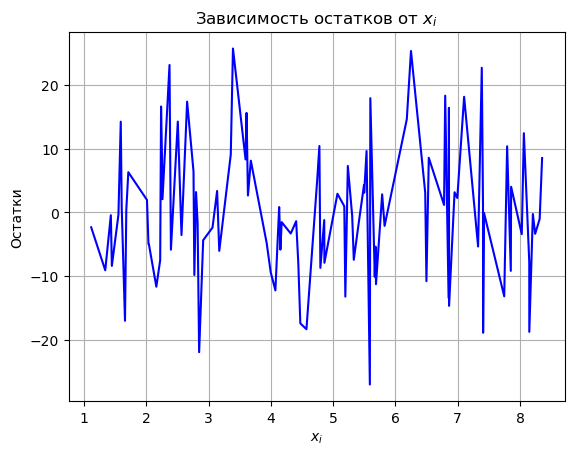

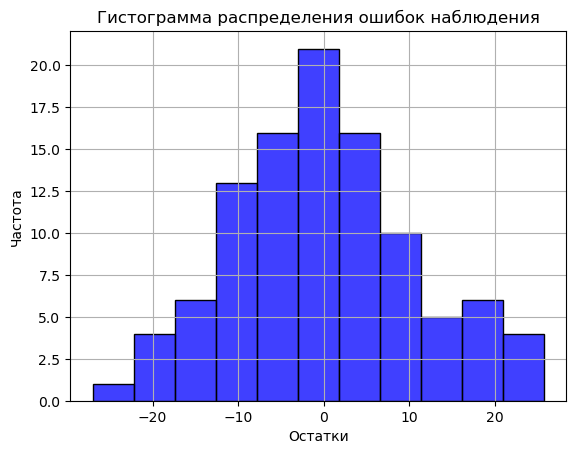

In [12]:
# Создание списков для остатков (разницы между наблюдаемыми и модельными значениями)
residuals = []  # Остатки (ошибки наблюдения)
predicted_y = []  # Значения Y, предсказанные моделью

# Расчет предсказанных значений Y и остатков
for xi in x:
    predicted_y.append(b[0] + b[1] * xi + b[2] * xi**2)  # Модельное значение Y
for i in range(n):
    residuals.append([x[i], y[i] - predicted_y[i]])  # Остатки: наблюдаемое значение - предсказанное

# Сортировка остатков по значениям x
residuals = sorted(residuals, key=lambda item: item[0])  # Сортировка по x

# Подготовка данных для построения графиков
sorted_x = [item[0] for item in residuals]  # Отсортированные значения x
residual_values = [item[1] for item in residuals]  # Остатки для каждого x

# Построение графика зависимости остатков от значений x
plt.figure()  # Создание новой фигуры
plt.plot(sorted_x, residual_values, color="b")  # Линия зависимости остатков
plt.title("Зависимость остатков от $x_i$")
plt.xlabel("$x_i$")  # Подпись оси x
plt.ylabel("Остатки")  # Подпись оси y
plt.grid()  # Добавление сетки

# Построение гистограммы распределения остатков
plt.figure()  # Создание новой фигуры
sns.histplot(residual_values, color="b", bins="sqrt")  # Гистограмма остатков
plt.title("Гистограмма распределения ошибок наблюдения")
plt.xlabel("Остатки")  # Подпись оси x
plt.ylabel("Частота")  # Подпись оси y
plt.grid()  # Добавление сетки

# Тест на нормальность распределения ошибок
shapiro_test = sts.shapiro(residual_values)  # Тест Шапиро-Уилка
alpha = 0.05  # Уровень значимости
print(f"Гипотеза о нормальном распределении остатков: принимаем при alpha<{shapiro_test.pvalue:.4f}")

# Расчет математического ожидания остатков
mean_residual = np.mean(residual_values)  # Среднее значение остатков
print(f"Математическое ожидание случайных ошибок: m = {mean_residual:.4f}")

**Задание 4.** Используйте для описания статистической зависимости компонент того же выборочного вектора модель $y = \beta_0 + \beta_1 x$. Сопоставьте характеристики построенной регрессионной модели с характеристиками регрессионной модели задания  $y = \beta_0 + \beta_1 x + \beta_2 x^2 $ Интерпретируйте результаты.

In [13]:
# Подготовка переменных для расчетов
xy_sum = 0  # Сумма произведений x и y
x_squared_sum = 0  # Сумма квадратов x
y_squared_sum = 0  # Сумма квадратов y

# Вычисление сумм для регрессионных расчетов
for i in range(n):
    xy_sum += x[i] * y[i]  # Сумма произведений x и y
    x_squared_sum += x[i]**2  # Сумма квадратов x
    y_squared_sum += y[i]**2  # Сумма квадратов y

# Расчет средних значений и дисперсий
mean_x, mean_y = np.mean(x), np.mean(y)  # Средние значения x и y
var_x, var_y = np.var(x), np.var(y)  # Дисперсии x и y

# Построение уравнения регрессии Y на x: Y = β0 + β1 * x
correlation_coefficient = (n * xy_sum - np.sum(x) * np.sum(y)) / (
    np.sqrt(n * x_squared_sum - np.sum(x)**2) * np.sqrt(n * y_squared_sum - np.sum(y)**2)
)  # Выборочный коэффициент корреляции

betta_1 = (n * xy_sum - np.sum(x) * np.sum(y)) / (n * x_squared_sum - np.sum(x)**2)  # Наклон β1
betta_0 = mean_y - betta_1 * mean_x  # Свободный член β0
print(f"Уравнение регрессии Y на x: Y = {betta_0:.4f} + {betta_1:.4f} * x")

Уравнение регрессии Y на x: Y = -22.0976 + 12.3084 * x


Оценка дисперсии ошибок (S^2): 163.9146581623924
Коэффициент детерминации (R^2): 0.8078152234407818
Доверительный интервал для b0 (перехват): (-27.249547030230826, -16.94567851905838)
Доверительный интервал для b1 (наклон): (11.311688650038642, 13.305136629922428)
Доверительный интервал для дисперсии ошибок наблюдений:
126.51523891623262 < Дисперсия ошибок < 220.84397931833803

Отклоняем H0 -> Н1 принимаем -> линейная регрессия значима


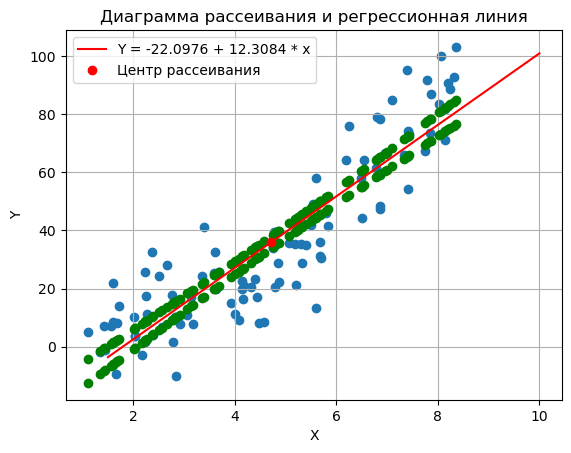

In [14]:
# Инициализация переменных для вычислений
predicted_y = 0  # Прогнозируемые значения y
sum_of_squares_residuals = 0  # Сумма квадратов отклонений (ошибок регрессии)
total_variance_y = 0  # Общая дисперсия y
total_variance_x = 0  # Общая дисперсия x

# Рассчитываем ошибку модели (сумма квадратов отклонений)
for i in range(n):
    predicted_y = betta_0 + betta_1 * x[i]  # Прогнозируемое значение y для текущего x
    sum_of_squares_residuals += (y[i] - predicted_y) ** 2  # Сумма квадратов отклонений

# Оценка дисперсии ошибок
S2 = sum_of_squares_residuals / (n - 2)
print(f"Оценка дисперсии ошибок (S^2): {S2}")

# Рассчитываем общие дисперсии для x и y
for i in range(n):
    total_variance_y += (y[i] - mean_y) ** 2  # Дисперсия для y
    total_variance_x += (x[i] - mean_x) ** 2  # Дисперсия для x

# Рассчитываем коэффициент детерминации R^2
R_squared = 1 - sum_of_squares_residuals / total_variance_y
print(f"Коэффициент детерминации (R^2): {R_squared}")

# Уровень значимости для доверительных интервалов
confidence_level = 0.95
t_critical = sts.t.ppf(confidence_level, n - 2)  # Критическое значение t-распределения

# Вычисляем стандартные ошибки коэффициентов
stderr_intercept = np.sqrt(S2 * x_squared_sum / (n * total_variance_x))  # Стандартная ошибка для перехвата
stderr_slope = np.sqrt(S2 / total_variance_x)  # Стандартная ошибка для наклона

# Доверительные интервалы для коэффициентов регрессии
intercept_interval = (betta_0 - t_critical * stderr_intercept, betta_0 + t_critical * stderr_intercept)
slope_interval = (betta_1 - t_critical * stderr_slope, betta_1 + t_critical * stderr_slope)

print(f"Доверительный интервал для b0 (перехват): {intercept_interval}")
print(f"Доверительный интервал для b1 (наклон): {slope_interval}")

# Рассчитываем доверительный интервал для дисперсии ошибок
alpha_level = 0.05
chi2_dist = sts.chi2(n - 2)  # Хи-квадрат распределение для дисперсии
lower_bound_dispersion = (n - 2) * S2 / chi2_dist.ppf(1 - alpha_level / 2)
upper_bound_dispersion = (n - 2) * S2 / chi2_dist.ppf(alpha_level / 2)
print("Доверительный интервал для дисперсии ошибок наблюдений:")
print(f"{lower_bound_dispersion} < Дисперсия ошибок < {upper_bound_dispersion}\n")

# Расчет интервалов для прогнозов
prediction_interval_lower = []  # Нижний предел интервала прогнозов
prediction_interval_upper = []  # Верхний предел интервала прогнозов
for i in range(len(x)):
    x0 = x[i]
    y0 = betta_0 + betta_1 * x0  # Прогнозируемое значение y для текущего x

    # Расчет интервала прогноза
    lower_bound_y = y0 - t_critical * np.sqrt(S2 * (1 / n + ((x0 - np.mean(x)) ** 2 / total_variance_x)))
    upper_bound_y = y0 + t_critical * np.sqrt(S2 * (1 / n + ((x0 - np.mean(x)) ** 2 / total_variance_x)))

    # Добавляем прогнозы и интервалы в списки
    prediction_interval_lower.append(lower_bound_y)
    prediction_interval_upper.append(upper_bound_y)

    # Отображаем прогнозные интервалы на графике
    plt.plot(x0, lower_bound_y, 'go', lw=0.1)  # Нижний предел
    plt.plot(x0, upper_bound_y, 'go', lw=0.1)  # Верхний предел

# Построение графика с доверительными интервалами
x_values_for_plot = np.linspace(1.5, 10, 100)
plt.plot(x_values_for_plot, betta_0 + betta_1 * x_values_for_plot, color='r', label=f'Y = {betta_0:.4f} + {betta_1:.4f} * x')
plt.plot(np.mean(x), np.mean(y), 'ro', label="Центр рассеивания")
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеивания и регрессионная линия')
plt.legend()
plt.grid(True)

# Проверка значимости линейной регрессии с помощью теста F
# H0: b1 = 0 (отсутствие линейной зависимости), H1: b1 != 0 (существует линейная зависимость)
slope_from_polyfit = np.polyfit(x, y, 1)[::-1]  # Наклон и перехват из полиномиальной аппроксимации
F_statistic = slope_from_polyfit[1] ** 2 * n * np.var(x) / S2  # Статистика F для проверки значимости регрессии
f_dist = sts.f(1, n - 2)  # F-распределение для статистики F
p_value = 2 * min(f_dist.cdf(F_statistic), 1 - f_dist.cdf(F_statistic))  # p-значение

# Проверка гипотезы о значимости линейной регрессии
if p_value < 0.05:
    print("Отклоняем H0 -> Н1 принимаем -> линейная регрессия значима")
else:
    print("Принимаем H0 -> линейная регрессия не значима -> проверка адекватности бессмысленна")